In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from taskdataset import TaskDataset
import torchvision
import cv2

path_to_data = "datasets/" # TODO Set path to datasets files
path_to_models = "models/"

# import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
# import torch.onnx
import onnx
import onnxscript
from torchsummary import summary

In [2]:
import pickle
import pandas as pd
dataset = pd.read_pickle(path_to_data + "data3.pck")


# with open('serialized.pkl', 'rb') as f:
#     data = pickle.load(f)

In [3]:

# for i in dataset['image']:

In [4]:



dataset2 = []

length = len(dataset)
# length = 100

for i in range(length):
    image = np.array(dataset['image'][i], dtype=np.uint8)


    if image.shape != (32, 32, 3):
        #convert to RGB
        # print(type(image[0]))
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        # print(image.shape)
    image.astype(np.float32)
    #convert to tensor
    image = torch.from_numpy(image)

    image = image.to(torch.float32) / 255
    label = dataset['output'][i]
    el = [image.reshape(3*32*32), label.astype(np.float32)]
    dataset2.append(el)
    # print(image.shape)
    # print(image.reshape(3*32*32).shape)



In [5]:
# dataset = torch.load(path_to_data + "ModelStealingPub.pt")
# dataset2 = []

# # lenght = len(dataset)
# length = 100

# for i in range(length):
#     image = np.array(dataset.imgs[i])


#     if image.shape != (32, 32, 3):
#         #convert to RGB
#         image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
#     #convert to tensor
#     image = torch.from_numpy(image)

#     image = image.to(torch.float32) / 255
#     label = np.random.rand(512)
#     el = [image.reshape(3*32*32), label.astype(np.float32)]
#     dataset2.append(el)
#     # print(image.shape)
#     # print(image.reshape(3*32*32).shape)



In [6]:
loader = torch.utils.data.DataLoader(dataset = dataset2,
                                     batch_size = 32,
                                     shuffle = True)

In [7]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            
            torch.nn.Linear(3 * 32 * 32, 1536),
            torch.nn.ReLU(),
            torch.nn.Linear(1536, 1536),
            torch.nn.ReLU(),
            torch.nn.Linear(1536, 512),
            
        )
         
 
    def forward(self, x):
        encoded = self.encoder(x)
        encoded.double()
        return encoded

In [8]:
# Model Initialization
model = AE()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)

In [9]:
# from torch.utils.data.sampler import SubsetRandomSampler

# val_split = 0.1
# train_size = len(dataset2)
# split = int(np.floor(val_split * train_size))


# indices = list(range(train_size))
# np.random.seed(13)
# np.random.shuffle(indices)
# train_indices, val_indices, test_indices = indices[split-:], indices[:split]

# train_sampler = SubsetRandomSampler(train_indices)
# val_sampler = SubsetRandomSampler(val_indices)

# dataset_sizes = {'train': len(train_indices), 'val': len(val_indices), 'test': SVIRO_test.__len__()}

# for x in ['train', 'val', 'test']:
#     print('[INFO] Number of ' + x + ' samples: ' + str(dataset_sizes[x]))


SyntaxError: invalid syntax (4004698098.py, line 11)

In [ ]:
# batch_size = 64
# train_loader = torch.utils.data.DataLoader(dataset = dataset2, batch_size, pin_memory=True, sampler=train_sampler)
# val_loader = torch.utils.data.DataLoader(dataset = dataset2, batch_size, pin_memory=True, sampler=val_sampler)
# test_loader = torch.utils.data.DataLoader(dataset = dataset2, batch_size, pin_memory=True)

# dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}

In [ ]:
epochs = 10
outputs = []
losses = []
all_losses = []

device = 'cuda' if torch.cuda.is_available() else 'cpu'

for epoch in range(epochs):
    
    print(f"\nEpoch {epoch+1} of {epochs}")
    print("-------------------------------")

    idx = -1

    for (image, labels) in loader:
      idx = idx + 1
      print(f"Epoch {epoch+1}, Bach {idx} of {len(loader)}")

      # Output of Autoencoder
      features = model(image)

      # Calculating the loss function
      loss = loss_function(features, labels)
       
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
       
      # Storing the losses in a list for plotting
      losses.append(float(loss))
    outputs.append((epochs, image, features))
    all_losses.append(np.average(losses)) 

    torch.onnx.export(model,                                # model being run
                      torch.randn(3*32*32).to(device),    # model input (or a tuple for multiple inputs)
                      path_to_models + f"zad1_model_e{epoch}.onnx",           # where to save the model (can be a file or file-like object)
                      input_names = ['input'],              # the model's input names
                      output_names = ['output'])            # the model's output names





Epoch 1 of 10
-------------------------------
Bach 0 of 32
Bach 1 of 32
Bach 2 of 32
Bach 3 of 32


Bach 4 of 32
Bach 5 of 32
Bach 6 of 32
Bach 7 of 32
Bach 8 of 32
Bach 9 of 32
Bach 10 of 32
Bach 11 of 32
Bach 12 of 32
Bach 13 of 32
Bach 14 of 32
Bach 15 of 32
Bach 16 of 32
Bach 17 of 32
Bach 18 of 32
Bach 19 of 32
Bach 20 of 32
Bach 21 of 32
Bach 22 of 32
Bach 23 of 32
Bach 24 of 32
Bach 25 of 32
Bach 26 of 32
Bach 27 of 32
Bach 28 of 32
Bach 29 of 32
Bach 30 of 32
Bach 31 of 32

Epoch 2 of 10
-------------------------------
Bach 0 of 32
Bach 1 of 32
Bach 2 of 32
Bach 3 of 32
Bach 4 of 32
Bach 5 of 32
Bach 6 of 32
Bach 7 of 32
Bach 8 of 32
Bach 9 of 32
Bach 10 of 32
Bach 11 of 32
Bach 12 of 32
Bach 13 of 32
Bach 14 of 32
Bach 15 of 32
Bach 16 of 32
Bach 17 of 32
Bach 18 of 32
Bach 19 of 32
Bach 20 of 32
Bach 21 of 32
Bach 22 of 32
Bach 23 of 32
Bach 24 of 32
Bach 25 of 32
Bach 26 of 32
Bach 27 of 32
Bach 28 of 32
Bach 29 of 32
Bach 30 of 32
Bach 31 of 32

Epoch 3 of 10
-------------------------------
Bach 0 of 32
Bach 1 of 32
Bach 2 of 32
Bach 3 of 32
Bach 4 of 32
Bach 5 of 32
Bach

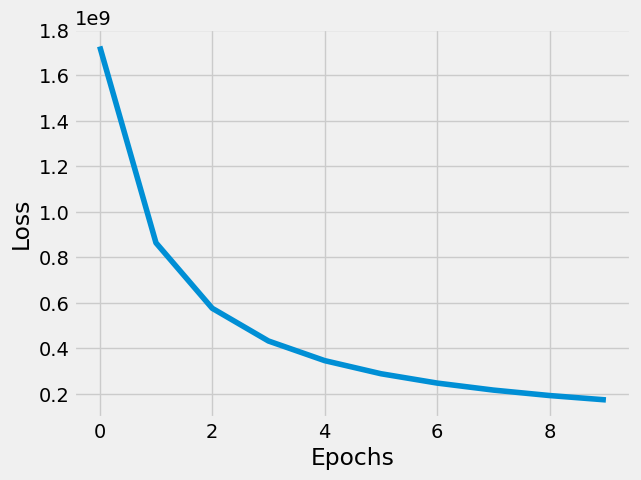

In [ ]:

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# losses2 = np.array(losses2)
 
# Plotting the last 100 values
plt.plot(all_losses)
# losses

In [ ]:
# onnx_model = onnx.load(path_to_models + "zad1_model_e9.onnx")
# onnx.checker.check_model(onnx_model)
